In [1]:
#Practice project 5 :  Big Data Mart Sales Problem Project

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


df_train=pd.read_csv(r'C:\ProgramData\bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df_test=pd.read_csv(r'C:\ProgramData\bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
# If we look at variable Item_Identifier , we can see different group of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable).
# On the other hand, regarding Item_Visibility there are items with the value zero which  indicates those items are not
# visible on the store.

In [4]:
# Exploratory Data Analysis

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Most of the items in the train dataset present 8523 non-null values.
# But there are some cases such as Item_Weight and Outlet_Size which have Null values.
# There are 12 features, 5 are numeric and 7 categorical.

In [6]:

df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


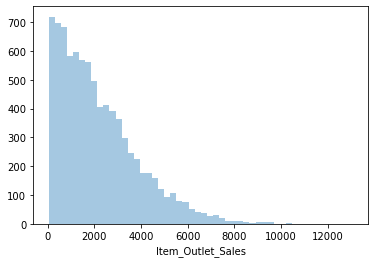

In [7]:
# Distribution plot of the target variable: Item_Outlet_Sales

plt.figure(figsize=(6,4))
sns.distplot(df_train['Item_Outlet_Sales'], kde=False);

In [8]:
# Checking skewness and kurtosis :

print ("Skew is:", df_train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df_train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


In [9]:
# We can see that our target variable is skewed to the right, towards the higher sales, with higher concentration on lower sales.

In [10]:
# checking for numeric features :

numeric_features= df_train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [11]:
# Correlation between Numeric features and Target variable

corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


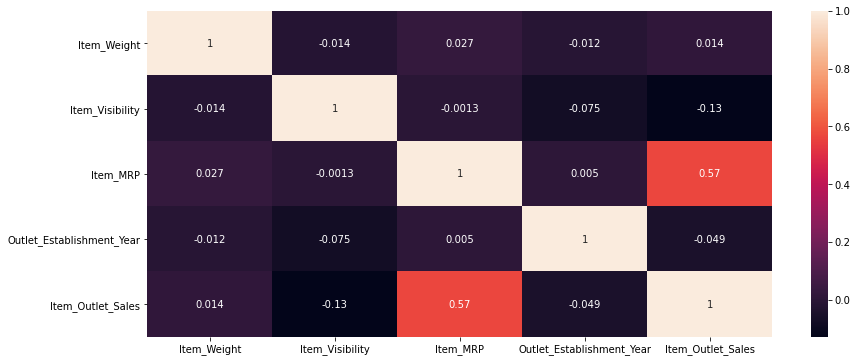

In [13]:
# checking correlation of numeric variables with target variable

plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
# From the current numeric variables we can observe that the Item_Visibility is the feature with the 
# lowest correlation with our target variable.
# And the most positive correlation belongs to Item_MRP .

In [15]:
# checking missing values for training data

df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# checking missing values for test data

df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
# filling null values for Item_Weight variable for training and test data

df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [18]:
# filling null values for Outlet Size variable for training data
#Importing mode function:

from scipy.stats import mode

#Determing the mode for each outlet_size for training and test:

outlet_size_mode_train = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

outlet_size_mode_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
# filling null values for Outlet Size variable for test data

#Determing the mode for each outlet_size for  test:

outlet_size_mode_test = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

outlet_size_mode_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
# filling null values for Outlet_Size variable for training data

def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode_train.loc['Outlet_Size'][outlet_size_mode_train.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(df_train['Outlet_Size'].isnull()))
df_train['Outlet_Size'] = df_train[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df_train['Outlet_Size'].isnull()))

Orignal #missing: 2410
Final #missing: 0


In [21]:
# filling null values for Outlet_Size variable for test data

def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode_test.loc['Outlet_Size'][outlet_size_mode_test.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(df_test['Outlet_Size'].isnull()))
df_test['Outlet_Size'] = df_test[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df_test['Outlet_Size'].isnull()))

Orignal #missing: 1606
Final #missing: 0


In [22]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [24]:
# Converting categorical data into ordinal data for training data so we will use LabelEncoder to convert it to ordinal.

le = LabelEncoder()
df_train=df_train.apply(le.fit_transform) 

In [25]:
# Converting categorical data into ordinal data for testing data so we will use LabelEncoder to convert it to ordinal.

df_test=df_test.apply(le.fit_transform) 

In [26]:
X=df_train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y=df_train['Item_Outlet_Sales']

In [27]:

# splitting data into training and test data using Train_test_split

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =12)

In [28]:
# Evaluation of models

#Training model with DecisionTreeClassifier and finding the best state

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

model_dt = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    acc=accuracy_score(y_test,y_pred_dt)
    if acc>score_s:
        score_s=acc
        state=i
        
print('best random_state : ',state)


best random_state :  4
best accuracy score :  0.023856081345326553


In [36]:
# Finding best root mean squared error with best random state

from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =4)
model_dt.fit(X_train, y_train)
y_pred_dt =model_dt.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_dt))
rmse

768.130844664393

In [37]:
# Training the model using LinearRegression and evaluating the model

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr =lr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))

print('root mean square error  : ',rmse)

root mean square error  :  628.7775368498786


In [39]:
#Training model with Ridge Model

from sklearn.linear_model import Ridge
r= Ridge(alpha=0.05,normalize=True)
r.fit(X_train, y_train)
y_pred_r =r.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_r))

print('root mean square error  : ',rmse)

root mean square error  :  629.1332529873248


In [40]:
# Clearly LinearRegression is good enough to predict sales

ModuleNotFoundError: No module named 'xgboost'